## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset 

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploring Dataset

In [3]:
print(df.info())      # Get information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [4]:
print(df.describe())  # Statistical summary of the dataset

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


## Data Preprocessing

In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Heirarchical Clustering

In [8]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

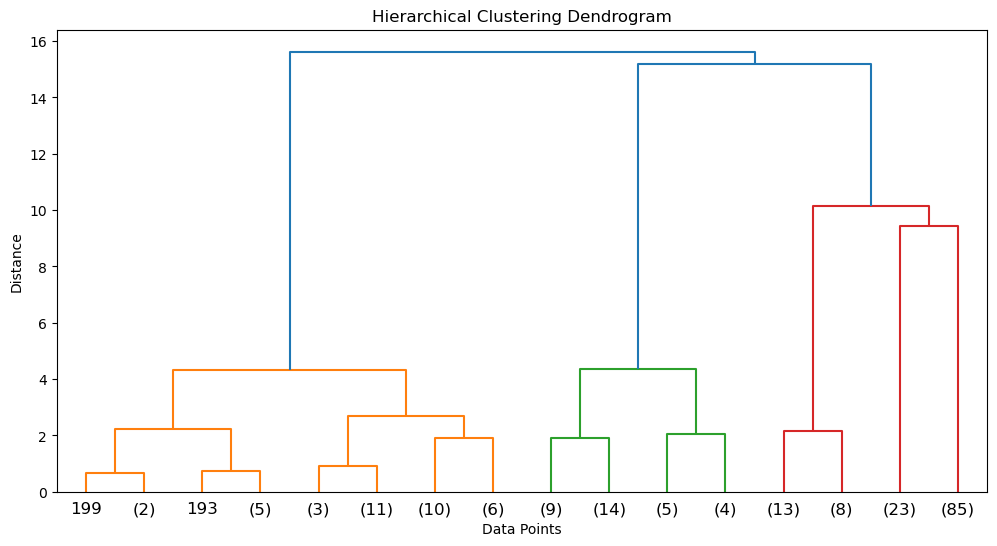

In [9]:
# Compute the linkage matrix
Z = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=3)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')

plt.show()

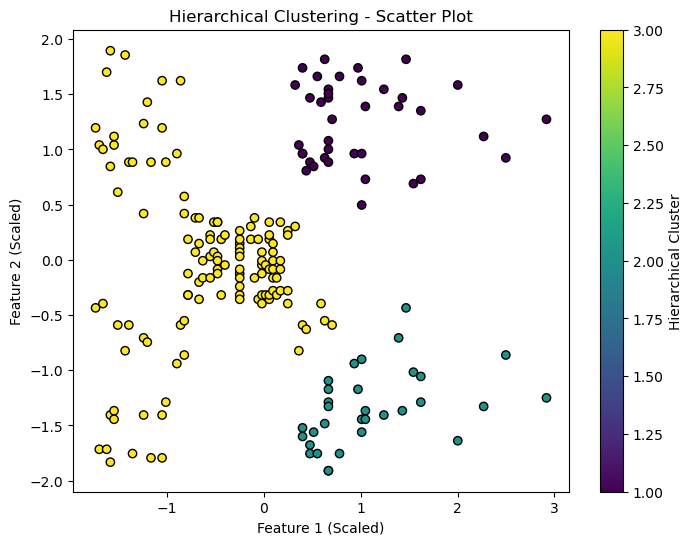

In [10]:
# Determine the hierarchical clusters
clusters = fcluster(Z, 3, criterion='maxclust')

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', edgecolor='black')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.title('Hierarchical Clustering - Scatter Plot')
plt.colorbar(label='Hierarchical Cluster')

plt.show()

## K-Means Clustering

Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

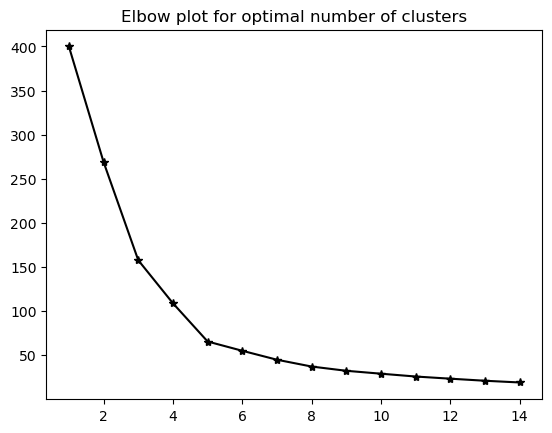

In [11]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

wscc = []
for i in range(1,15): 
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(X_scaled)
    wscc.append(kmeans.inertia_)  

plt.plot(range(1,15),wscc,marker="*",c="black")
plt.title("Elbow plot for optimal number of clusters")

## KMeans clustering with 5 clusters

In [12]:
k_means = KMeans(n_clusters=5)
k_means.fit(X_scaled)

KMeans(n_clusters=5)

In [13]:
np.unique(k_means.labels_)

array([0, 1, 2, 3, 4])

In [14]:
centers = k_means.cluster_centers_

centers

array([[-1.32954532,  1.13217788],
       [ 0.99158305,  1.23950275],
       [ 1.05500302, -1.28443907],
       [-0.20091257, -0.02645617],
       [-1.30751869, -1.13696536]])

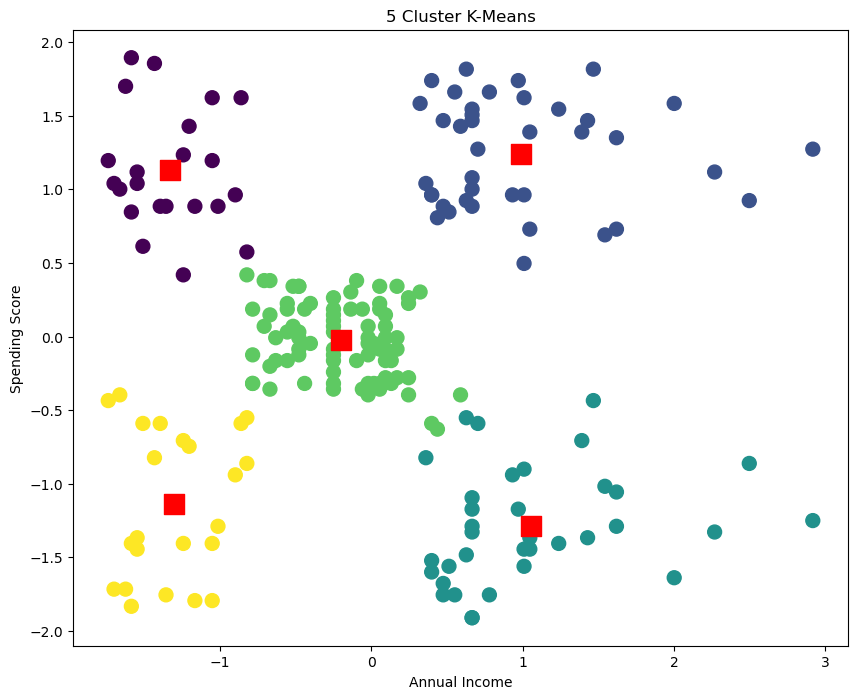

In [15]:
# Visualize the clusters
plt.figure(figsize=(10, 8))

plt.scatter(X_scaled[:,0], 
            X_scaled[:,1], 
            c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='red', marker='s', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('5 Cluster K-Means')

plt.show()

### Silhouette Score: This is a better measure to decide the number of clusters to be formulated from the data.

In [16]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, k_means.labels_)

print("Score = ", score)

Score =  0.5546571631111091


This function returns the Silhouette Coefficient for each sample.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.

In [17]:
score1 = metrics.silhouette_samples(X_scaled, k_means.labels_, metric='euclidean')
print("Score = ", score1)

Score =  [ 0.41124046  0.69620683  0.63934069  0.69604195  0.38563359  0.69748215
  0.64833998  0.65893138  0.62927054  0.66184814  0.67709497  0.62250892
  0.67914947  0.7183836   0.67989007  0.72517377  0.480728    0.54086604
  0.57771355  0.63069704  0.46089203  0.67601561  0.64089467  0.67033897
  0.66074953  0.70471845  0.48567333  0.29331369  0.4925691   0.6846275
  0.60601978  0.61174317  0.57727428  0.61836077  0.6096252   0.64028425
  0.58637068  0.52937454  0.42191998  0.48596674  0.09076309  0.54813337
 -0.01212476  0.12114123  0.3126116   0.04964594  0.39355123  0.43860327
  0.29680812  0.29680812  0.52456542  0.3036705   0.51899981  0.34289529
  0.49331338  0.37566018  0.60191899  0.54434561  0.64121219  0.59585853
  0.55956233  0.58127935  0.65113096  0.50415135  0.6798204   0.52847598
  0.6854379   0.66721797  0.52847598  0.65430631  0.64323927  0.57415557
  0.70785199  0.64042968  0.73240011  0.71960708  0.73182343  0.74129029
  0.74159279  0.6536531   0.74900504  0.704

## DB Scan

In [18]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [19]:
# Create the DBSCAN model
dbscan = DBSCAN(eps=0.4, min_samples=10)

# Fit the model to the data
dbscan.fit(X_scaled)

# Get the cluster labels
labels = dbscan.labels_

In [20]:
# Number of clusters in labels, ignoring noise if present
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

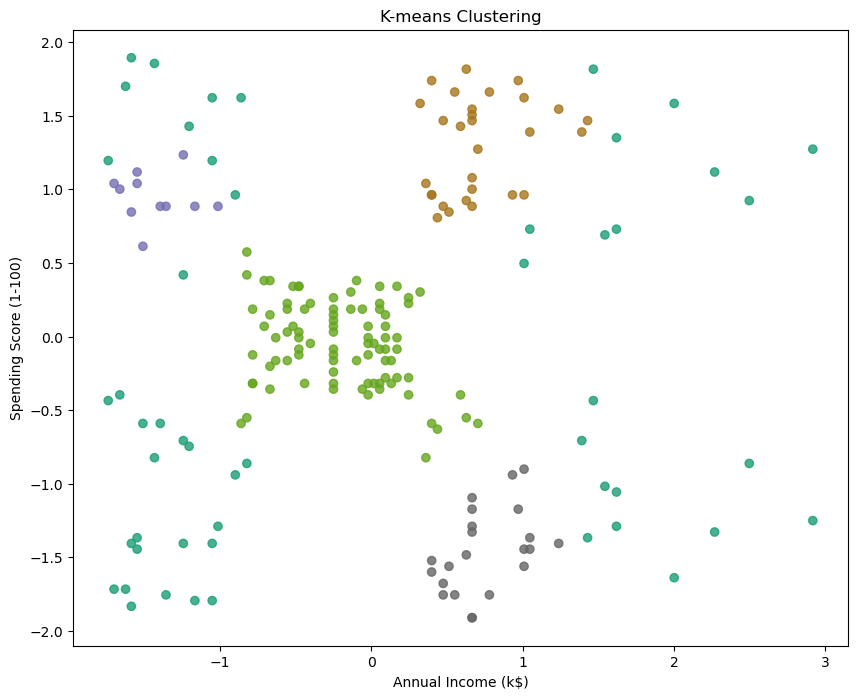

In [21]:
import matplotlib.cm as cm

# Choose a dark color map
cmap = cm.get_cmap('Dark2')

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap=cmap, alpha=0.8)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering')
plt.show()

## Mean Shift

In [22]:
from sklearn.cluster import MeanShift

In [23]:
# Create an instance of MeanShift with bandwidth
model_ms = MeanShift(bandwidth=25)

# Fit the MeanShift model to the data
model_ms.fit(X)

# Get the cluster labels
yhat_ms = model_ms.predict(X)
clusters_ms = np.unique(yhat_ms)
print("Clusters of Mean Shift:", clusters_ms)
labels_ms = model_ms.labels_

Clusters of Mean Shift: [0 1 2 3 4]


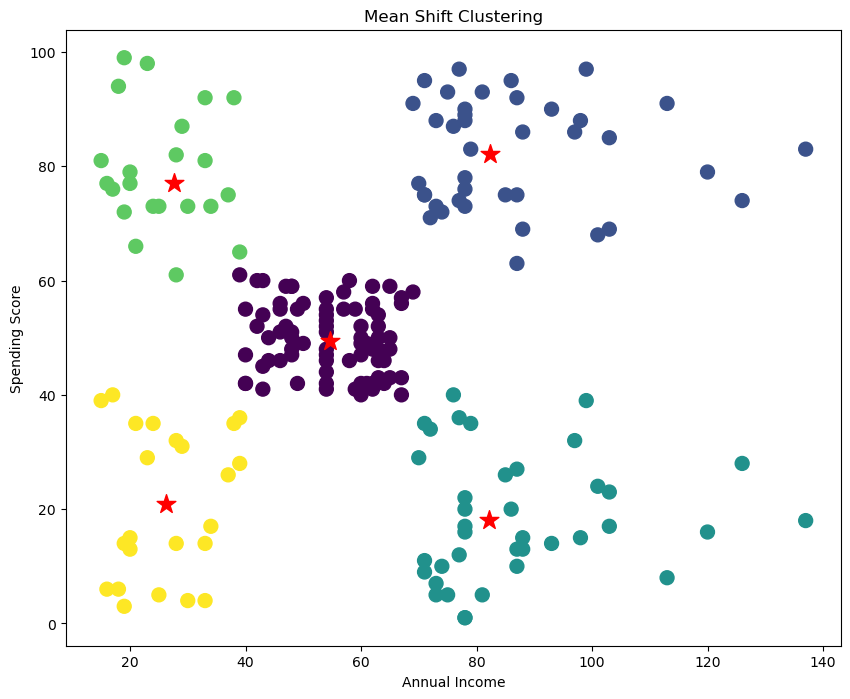

In [24]:
#visualizing clusters
plt.figure(figsize=(10, 8))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=labels_ms, s=100)
centroids_ms = model_ms.cluster_centers_
plt.scatter(centroids_ms[:, 0], centroids_ms[:, 1], color='red', marker='*', s=200)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Mean Shift Clustering')
plt.show()

## Gaussian Mixture Model

In [25]:
from sklearn.mixture import GaussianMixture

In [26]:
# Create the GMM model with the desired number of clusters
n_clusters = 5
model_gmm = GaussianMixture(n_components=n_clusters, random_state=42)

In [27]:
# Fit the model to the scaled data
model_gmm.fit(X_scaled)

GaussianMixture(n_components=5, random_state=42)

In [28]:
# Predict the cluster labels
labels_gmm = model_gmm.predict(X_scaled)

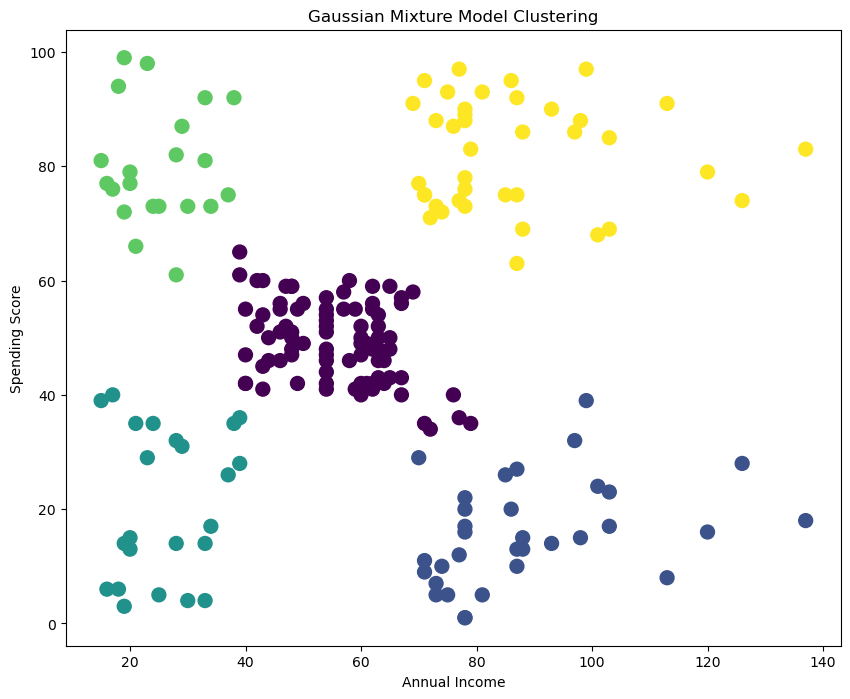

In [29]:
# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=labels_gmm, cmap='viridis', s=100)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Gaussian Mixture Model Clustering')
plt.show()

### All clusters at once

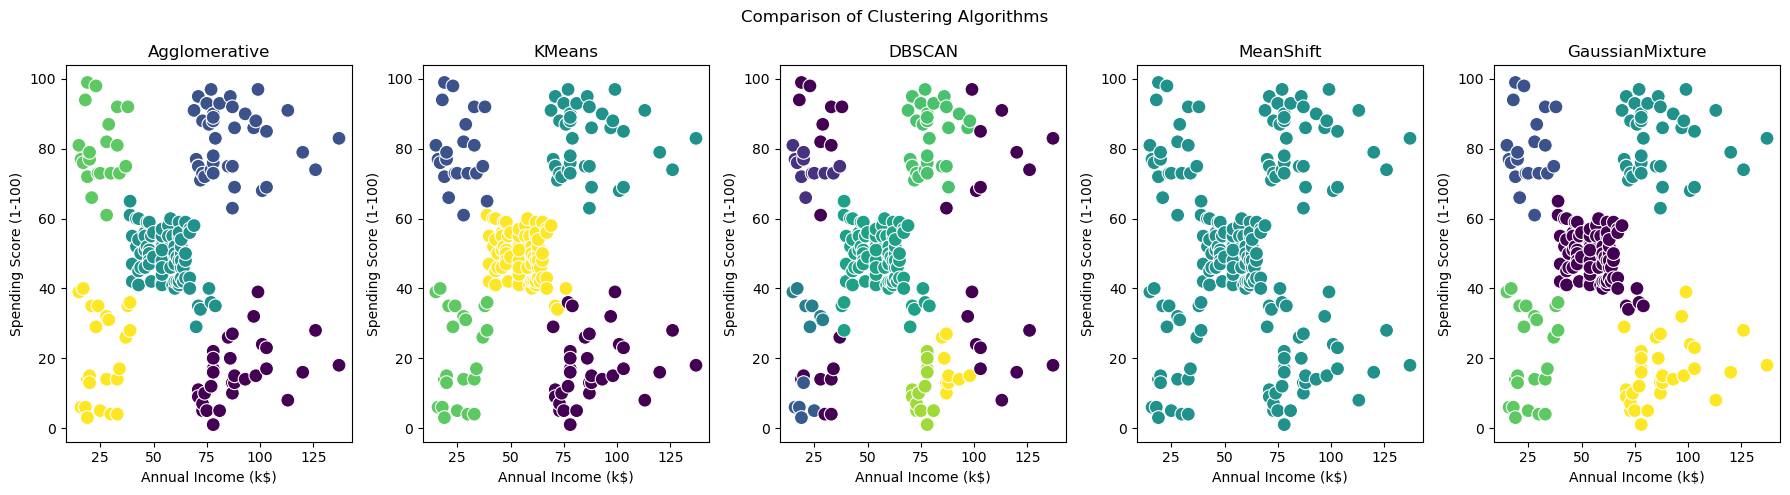

In [30]:
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift

# Define the clustering algorithms to compare
algorithms = [
    ('Agglomerative', AgglomerativeClustering(n_clusters=5)),
    ('KMeans', KMeans(n_clusters=5)),
    ('DBSCAN', DBSCAN(eps=0.3, min_samples=5)),
    ('MeanShift', MeanShift()),
    ('GaussianMixture', GaussianMixture(n_components=5))
]

# Create subplots for each clustering algorithm
fig, axes = plt.subplots(1, len(algorithms), figsize=(18,5))

# Iterate over each algorithm and plot the clusters
for i, (name, algorithm) in enumerate(algorithms):
    # Fit the algorithm to the data and obtain cluster labels
    if name == 'GaussianMixture':
        algorithm.fit(X_scaled)
        labels = algorithm.predict(X_scaled)
    else:
        labels = algorithm.fit_predict(X_scaled)

    # Plot the clusters
    sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue=labels, palette='viridis', s=100, ax=axes[i], legend=False)
    axes[i].set_title(name)

# Set a common title for the entire plot
fig.suptitle('Comparison of Clustering Algorithms')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()